# 명령어
    python3 train.py --weights preweight.pt --data data/WIDER_FACE.yaml --cfg models/yolov5s_v2_RFEM_MultiSEAM.yaml --batch-size 32 --epochs 250

# 관련 함수

- tensorflow버전은 함수가 있음. pytorch 버전은 따로 없고, 구현 필요
### space_to_depth
[tf.nn.space_to_depth](https://www.tensorflow.org/api_docs/python/tf/nn/space_to_depth)
***
        block_size = 4 # 640 / 4 = 160
        N, C, H, W = imgs.size()
        imgs = imgs.view(N, C, H // block_size, block_size, W // block_size, block_size)  # (N, C, H//bs, bs, W//bs, bs)
        imgs = imgs.permute(0, 3, 5, 1, 2, 4).contiguous()  #  (N, bs, bs, C, H//bs, W//bs)
        imgs = imgs.view(N, C * (block_size ** 2), H // block_size, W // block_size)  # (N, C*bs^2, H//bs, W//bs)
        test_size = imgs.size()
***

### depth_to_space
[tf.nn.depth_to_space](https://www.tensorflow.org/api_docs/python/tf/nn/depth_to_space)
***
        N, C, H, W = imgs.size()
        imgs = imgs.view(N, block_size, block_size, C // (block_size ** 2), H, W)  # (N, bs, bs, C//bs^2, H, W)
        imgs = imgs.permute(0, 3, 4, 1, 5, 2).contiguous()  # (N, C//bs^2, H, bs, W, bs)
        imgs = imgs.view(N, C // (block_size ** 2), H * block_size, W * block_size)  # (N, C//bs^2, H * bs, W * bs)
        test_size = imgs.size()
***

![img.png](./img/spacetodepth.png)

## space_to_depth 구현한 곳 (train.py, test.py)

- 이미지를 정규화한 후, 기존 이미지를 4개로 자른 후, 채널로 늘림 (NCHW (N=batch_size, C=channel, H=image_height, W=image_width)

    ex) NCHW = (32, 3, 640, 640) -> (32, 48, 160, 160)
    
    - train.py
        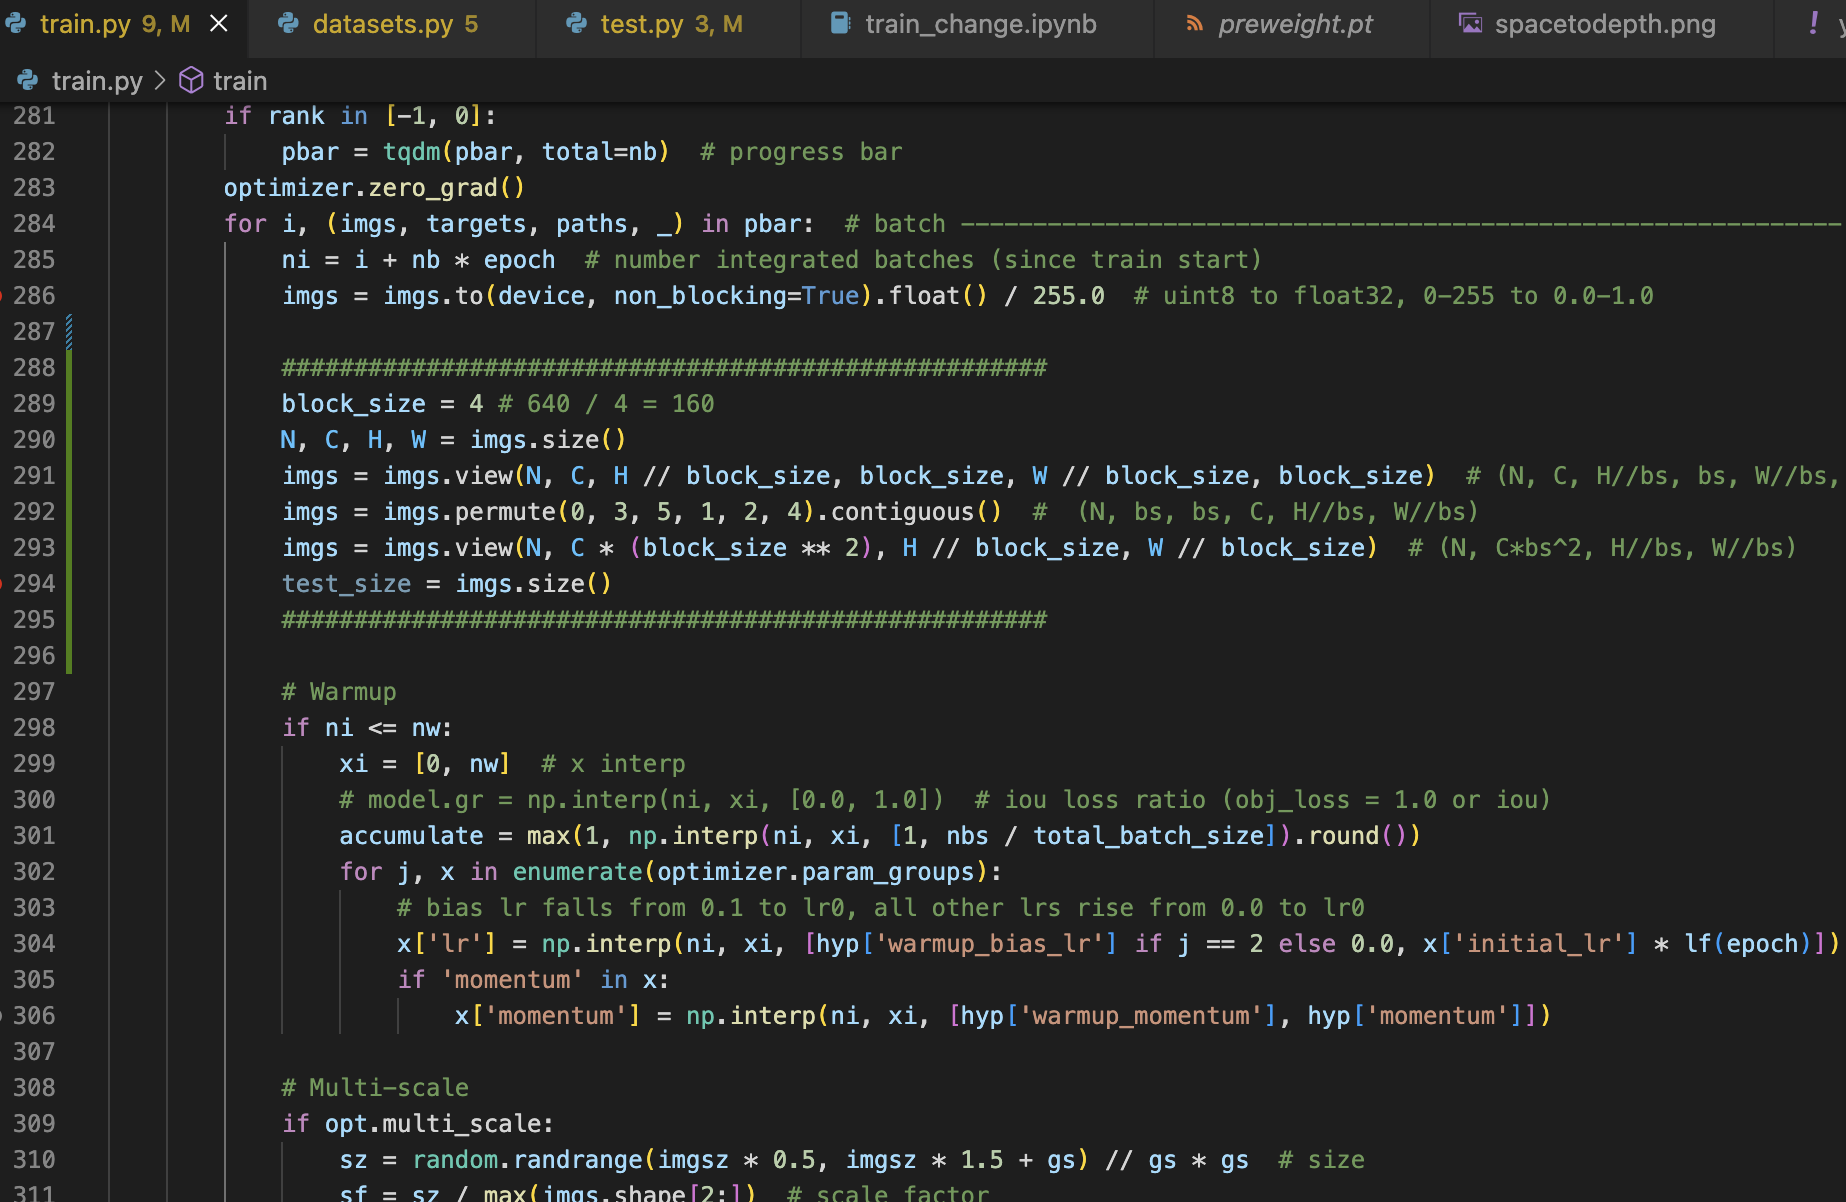
    - test.py
        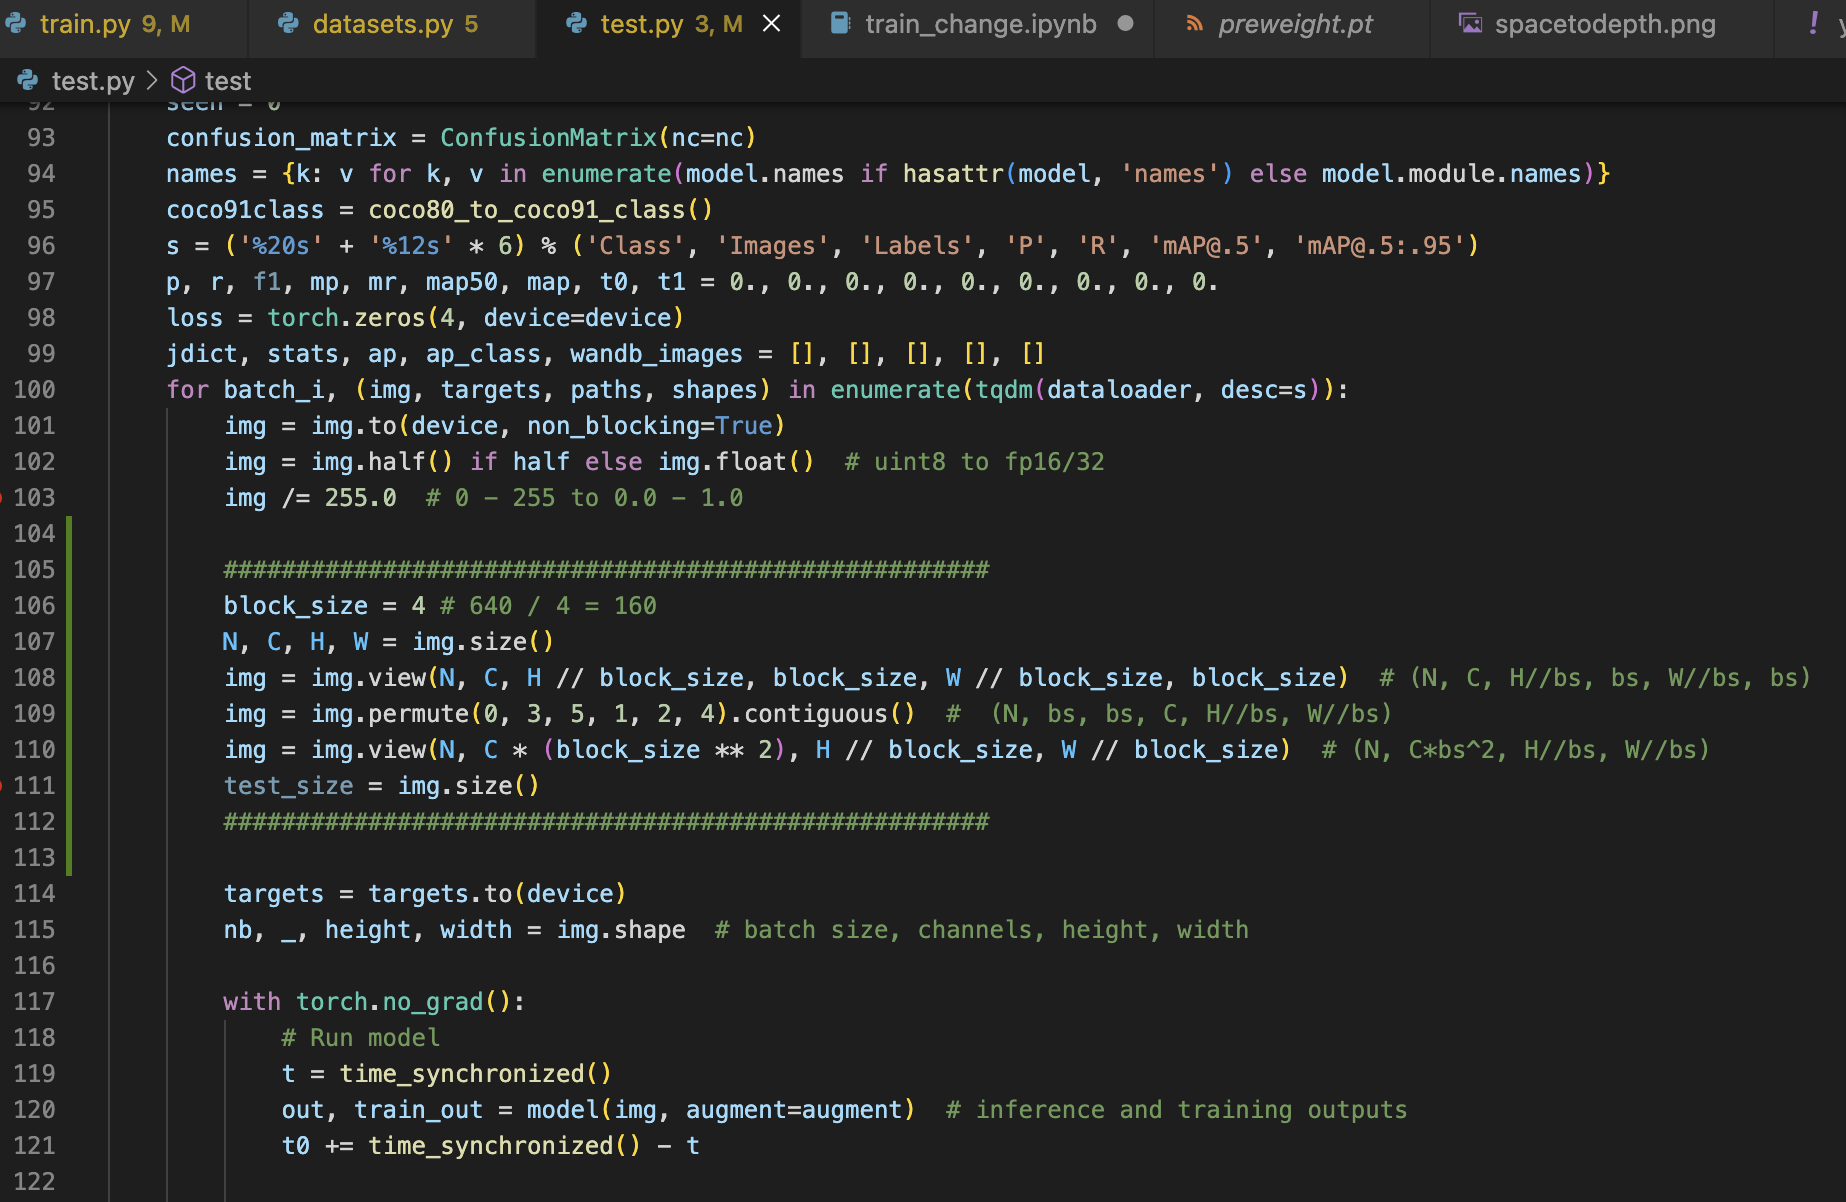

## Depth_to_Space가 필요한 이유

- plot 함수를 그릴 때, 이미지를 원상복귀해야함. 그러므로 train을 마친 후, img 원상복귀를 위해 depth_to_space 실행
    - warning:
        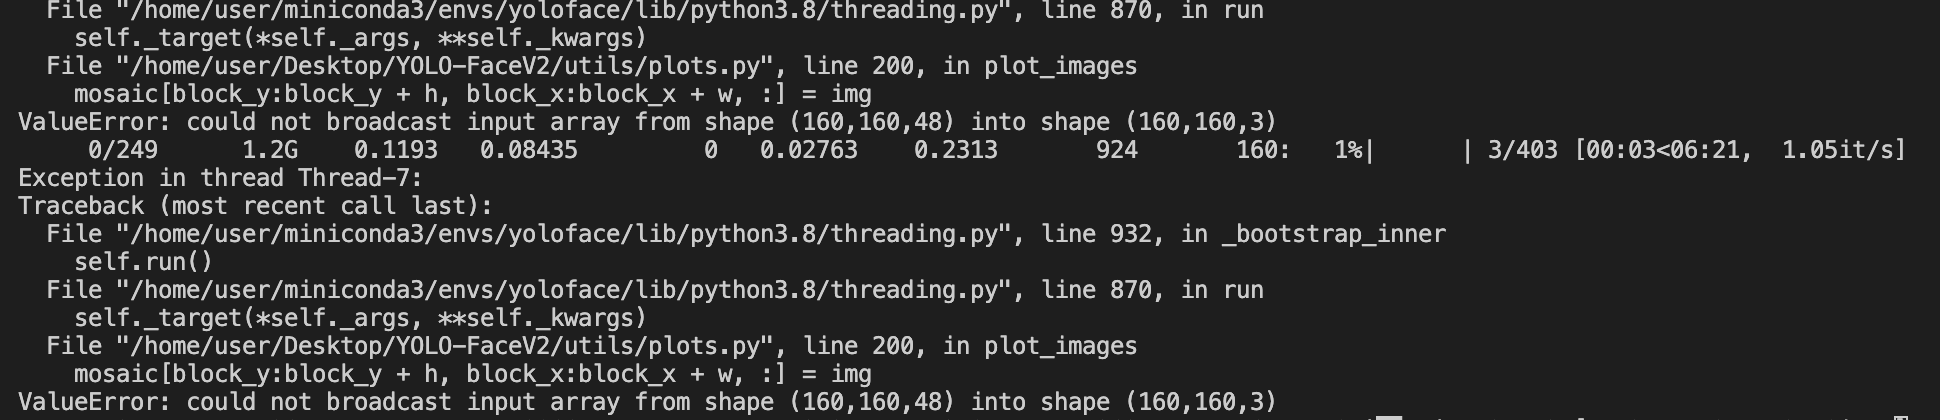
    - 고친 부분
        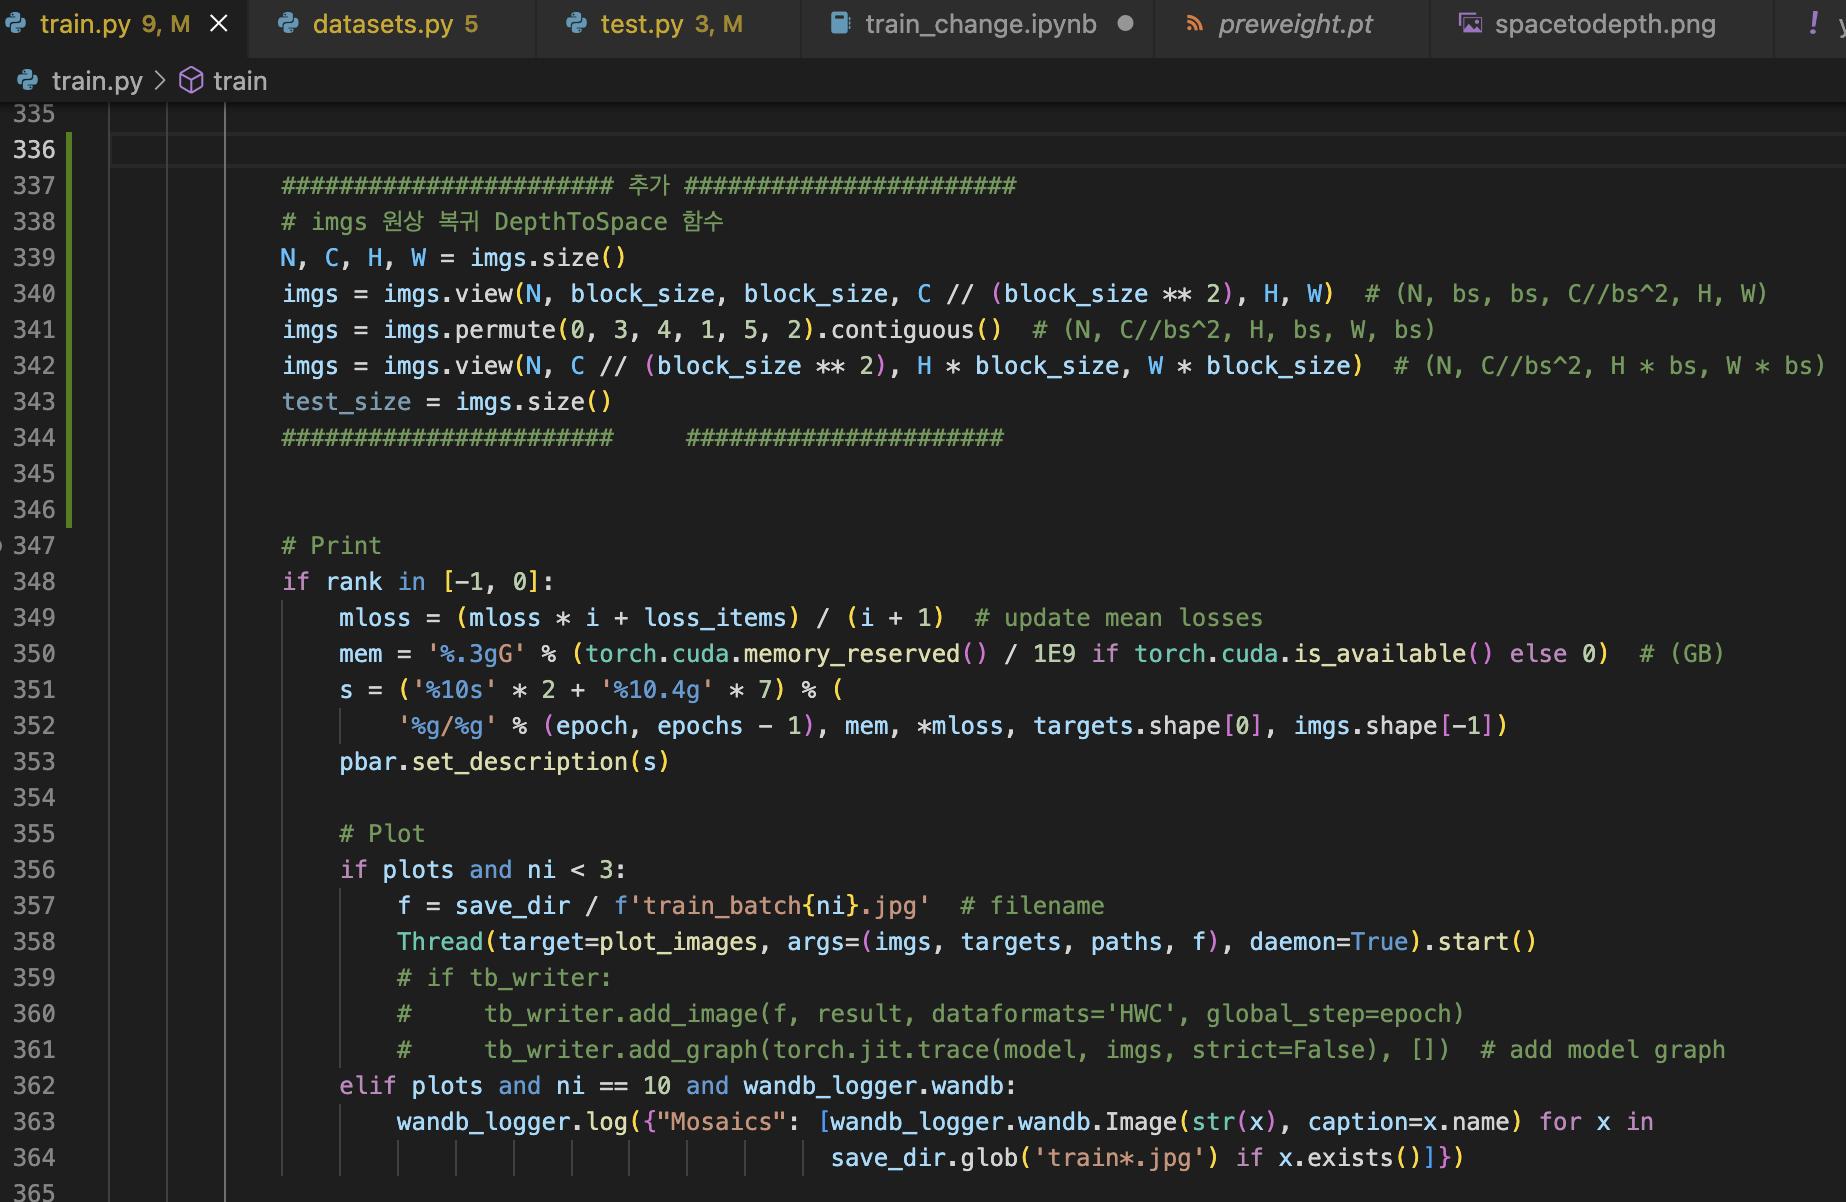

# 추가 변경

- --cfg 변경 -> ch: 48 추가
    - 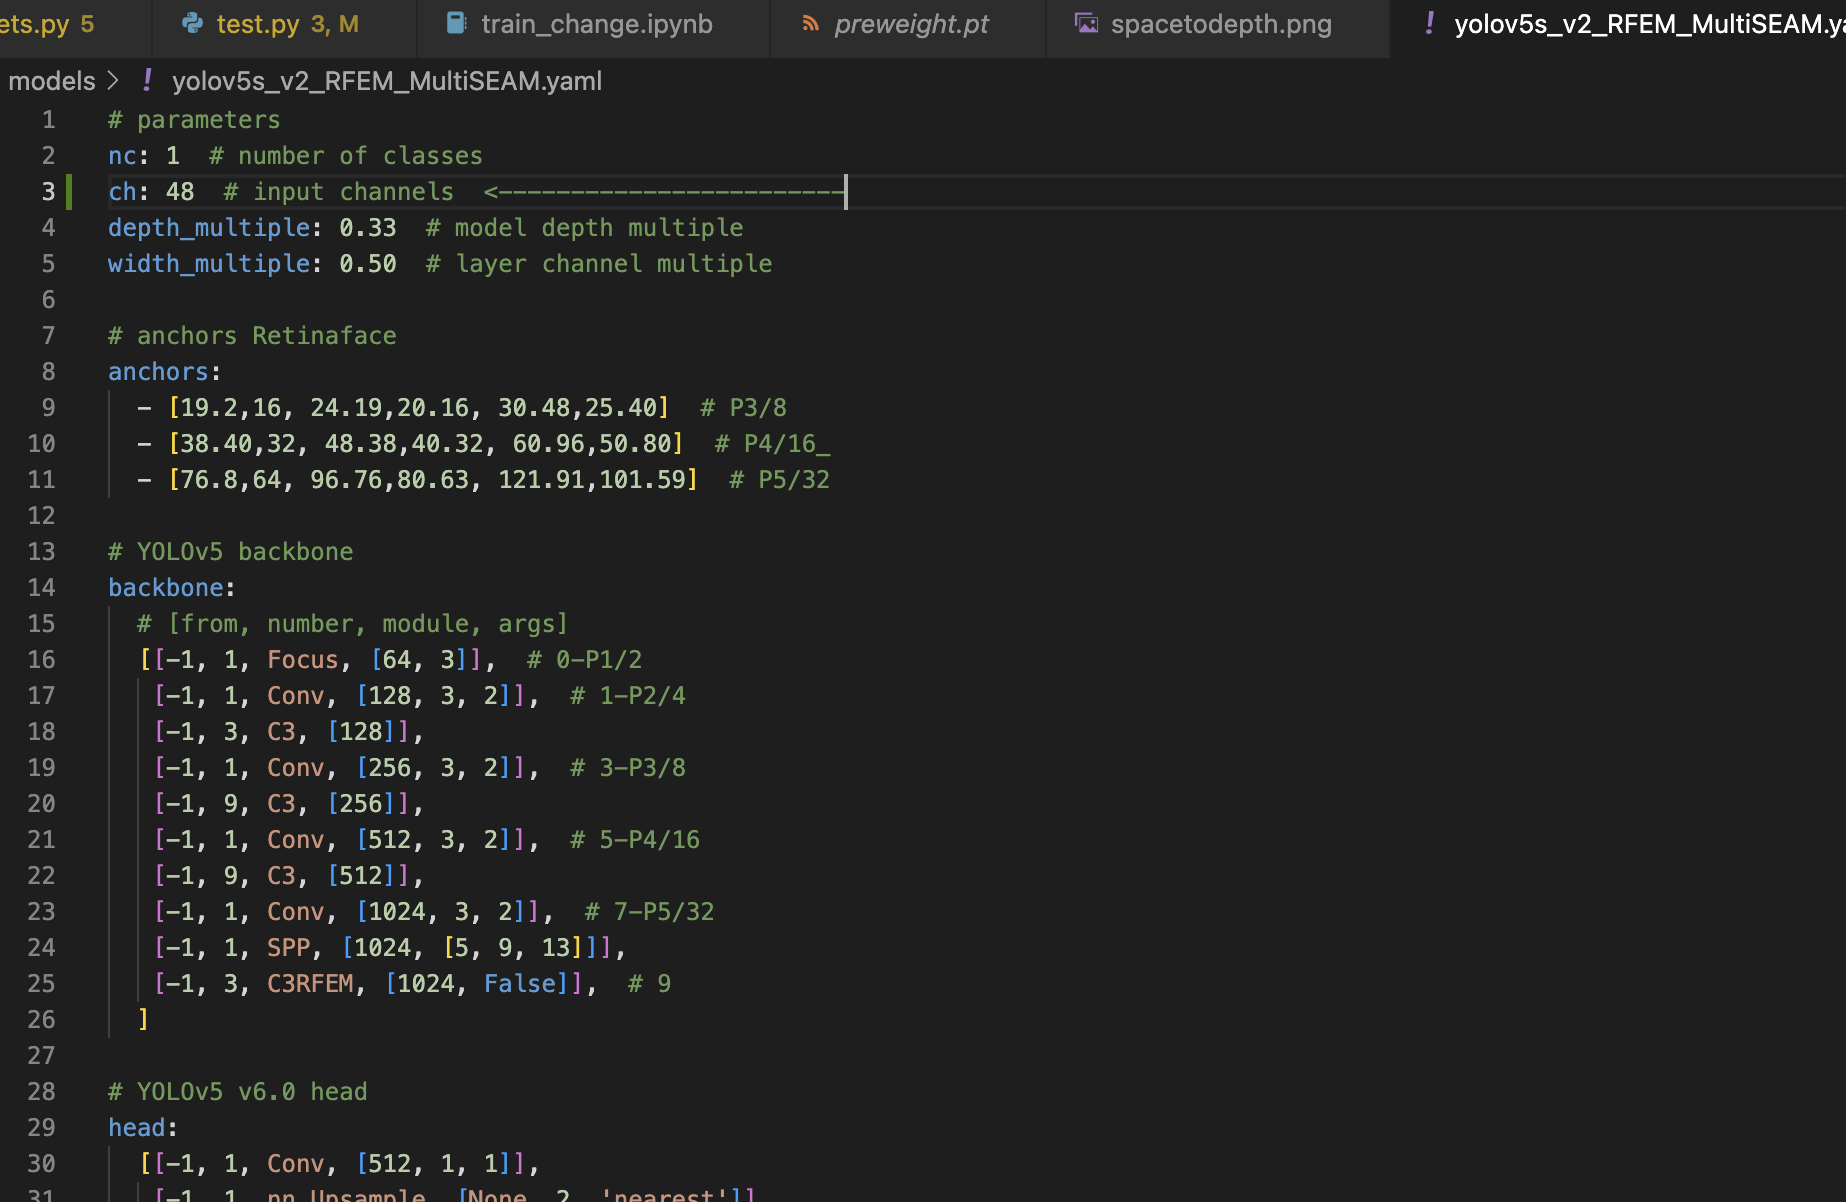

# 오류 발생 (해결 x)

- 오류 발생 지점. train.py에서 test 함수를 실행할 때 발생 (이때, test는 train/val/test할 때 test 아닌 듯 함. train하는 동안, test.py의 test함수를 실행)
    - 오류에 대해 자세하게 파악하지 못 한 상태. 하지만, convoltuion 과정에서 dimension이 맞지 않아 오류가 발생했는데, cfg에서 네트워크를 변경해야하는지, 코드 내에 변경해야하는 부분이 필요한지, 아니면 애초에 코드를 삽입한 부분이 잘못 됐는지 파악하지 못함.
        - 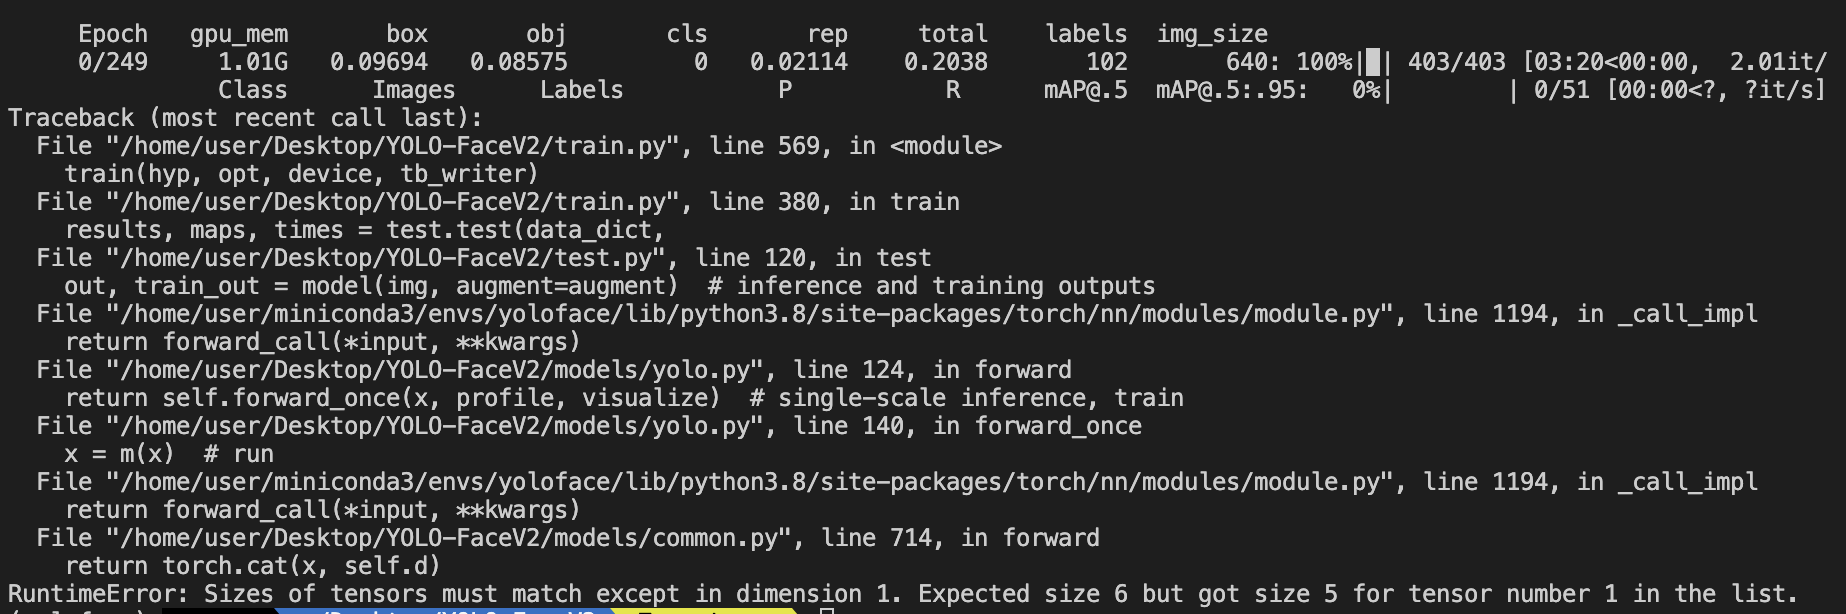

# 코드 수정 전, YOLO-FACEV2 train 결과
(preweight.pt은 YOLO-FACEV2에서 배포한 weight입니다.)

- confusion_matrix
    - 결과
        - ![img.png](./runs/train/exp27/confusion_matrix.png)

- F1_curve
    - 결과
        - ![F1_curve.png](./runs/train/exp27/F1_curve.png)

- PR_curve
    - 결과
        - ![F1_curve.png](./runs/train/exp27/PR_curve.png)

- results
    - 결과
        - ![F1_curve.png](./runs/train/exp27/results.png)


그 외, 결과는 run/train/exp27 에 있습니다.